References\
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras \
https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda \
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

## Keras Neural Networks
### Parts
#### > Functions
    >> Final Evaluate Function
#### > Analysis
    >> Genres
    >> Studios
    >> Genres+Studios 
    >> Popularity
    >> Members
#### >Standardise Function
    >> re-analysis of Popularity
    >> re-analysis of Members

### Functions

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.losses import mean_squared_error  # For regression
# from tensorflow.keras.losses import categorical_crossentropy  # For classification (uncomment if needed)
from tensorflow.keras.models import load_model  # For loading saved models
from tensorflow.keras.callbacks import EarlyStopping  # Optional for early stopping

def create_model(input_shape, features, target, loss_function='mean_squared_error'):
  """
  Creates a neural network model for regression or classification.

  Args:
    input_shape: The shape of the input data (e.g., number of features).
    features: A list of feature column names from your DataFrame.
    target: The target column name from your DataFrame.
    loss_function: The loss function to use ('mean_squared_error' for regression,
                   'categorical_crossentropy' for multi-class classification).

  Returns:
    The compiled Keras model.
  """

  # Define the Keras model for regression or classification
  model = Sequential()
  model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='linear'))  # Linear activation for regression

  # Compile the model for regression or classification
  if loss_function == 'mean_squared_error':
    metrics = ['accuracy', Precision(name='precision'), Recall(name='recall')]
  else:
    metrics = ['accuracy', 'precision', 'recall']  # Adjust metrics for classification

  model.compile(loss=loss_function, optimizer='adam', metrics=metrics)
  return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=150, batch_size=200, early_stopping=False):
  """
  Trains the neural network model with optional early stopping.

  Args:
    model: The Keras model to train.
    X_train: The training features.
    y_train: The training target.
    X_val: The validation features (optional).
    y_val: The validation target (optional).
    epochs: The number of training epochs.
    batch_size: The batch size for training.
    early_stopping: Whether to use early stopping (default: False).

  Returns:
    The training history object.
  """

  # Optional early stopping callback
  callbacks = []
  if early_stopping:
    callbacks.append(EarlyStopping(monitor='val_loss', patience=5))  # Adjust patience as needed

  # Train the model
  history = model.fit(X_train, y_train,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(X_val, y_val),
                      callbacks=callbacks)
  return history

def save_model(model, filepath):
  """
  Saves the trained model to a file.

  Args:
    model: The trained Keras model.
    filepath: The path to save the model (e.g., 'my_model.h5').
  """

  model.save(filepath)
  print(f"Model saved to {filepath}")

def load_model(filepath):
  """
  Loads a saved Keras model.

  Args:
    filepath: The path to the saved model file.

  Returns:
    The loaded Keras model.
  """

  return load_model(filepath)

def plot_training_history(history):
  """
  Visualizes training history of a model from Keras history object.

  Args:
    history: History object returned by the model.fit() function during training.
  """

  # Access metrics using attribute names (not square brackets)
  available_metrics = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

  # Check for additional metrics (precision, recall) and add them if present
  for metric in ['precision', 'recall']:
    if metric in history.history:
      available_metrics.extend([metric, f'val_{metric}'])

  # Plot each available metric
  for metric in available_metrics:
    if metric in history.history:
      plt.plot(history.history[metric], label=metric.capitalize())  # Capitalize metric name

  # Common plot formatting
  plt.title('Training and Validation Metrics')
  plt.ylabel('Metric Value')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


#### (optional function)

In [2]:
#alternative backup function that generates multiple graphs for each metric

import matplotlib.pyplot as plt

def plot_training_history_multiple(history):
  """
  Visualizes training history of a model from Keras history object.

  Args:
    history: History object returned by the model.fit() function during training.
  """

  # Access metrics using attribute names (not square brackets)
  available_metrics = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

  # Check for additional metrics (precision, recall) and add them if present
  for metric in ['precision', 'recall']:
    if metric in history.history:
      available_metrics.extend([metric, f'val_{metric}'])

  # Create separate subplots for each metric category (loss, accuracy, etc.)
  num_subplots = len(set(metric.split('_')[0] for metric in available_metrics))  # Get unique metric categories (loss, accuracy, etc.)
  rows, cols = (num_subplots // 2) + (num_subplots % 2 > 0), 2  # Grid layout for subplots

  fig, axes = plt.subplots(rows, cols, figsize=(10, 5))  # Create subplots

  # Plot each available metric on its corresponding subplot
  subplot_index = 0
  for metric in available_metrics:
    if metric in history.history:
      row, col = divmod(subplot_index, cols)  # Calculate subplot row and column
      axes[row, col].plot(history.history[metric], label=metric.capitalize())
      axes[row, col].set_title(metric.capitalize())
      axes[row, col].set_ylabel('Metric Value')
      axes[row, col].set_xlabel('Epoch')
      axes[row, col].legend()
      subplot_index += 1

  # Adjust spacing and display the plot
  fig.suptitle('Training and Validation Metrics')
  plt.tight_layout()
  plt.show()


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv')

Possible categorial variables we can evaluate using Neural Networks:
Genres (already one hot-encoded in df)
Studio (already one hot-encoded in df)
Licensors
Source
Rating

### Evaluate Function (based on main functions)

In [4]:
from sklearn.model_selection import train_test_split
def evaluate(features, target, file_name, dataframe=df):
    features_df=dataframe[features]
    # Print the shape of the features DataFrame (assuming df contains your data)
    print(f"Number of features (including encoded genres): {features_df.shape[1]}")
    
    # Assuming 'X' represents your features and 'y' represents the target variable
    X_train, X_val, y_train, y_val = train_test_split(features_df, df[[target]], test_size=0.2, random_state=42)

    # Create the model using the create_model function
    model = create_model(features_df.shape[1], features_df, target, loss_function='mean_squared_error')

    # Train the model using the train_model function
    history = train_model(model, X_train, y_train, X_val, y_val, epochs=150, batch_size=200)

    # Optionally, save the model after training
    save_model(model, file_name)

    # Visualize the training history using the plot_training_history function
    plot_training_history(history)


### Analysis of Genres

In [5]:
genres=['Action', 'Adventure', 'Avant Garde', 'Award Winning',
        'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 
        'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 
        'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
target = 'Score'

Number of features (including encoded genres): 19


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 40.7815 - precision: 1.0000 - recall: 0.4505 - val_accuracy: 0.0000e+00 - val_loss: 25.3996 - val_precision: 1.0000 - val_recall: 0.9685
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 19.7541 - precision: 1.0000 - recall: 0.9901 - val_accuracy: 0.0000e+00 - val_loss: 5.3365 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.2047 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.6946 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.0692 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.4894 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2.2238 - precision: 1.0000 - recall: 1.0000 - 

Model saved to genres_trained_model.h5


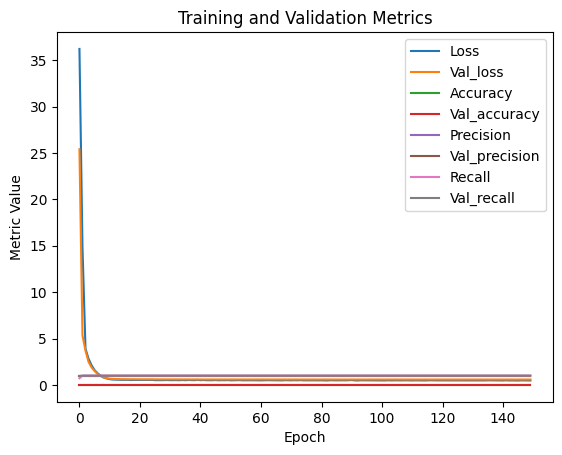

In [6]:
evaluate(genres, target, "genres_trained_model.h5")

### Analysis of Studios

In [7]:
studio = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 
          'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 
          'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 
          'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 
          'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 
          'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 
          'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 
          'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 
          'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 
          'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 
          'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 
          'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

Number of features (including encoded genres): 53
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0000e+00 - loss: 45.6871 - precision: 0.6842 - recall: 0.0895 - val_accuracy: 0.0000e+00 - val_loss: 37.6799 - val_precision: 1.0000 - val_recall: 0.6966
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 34.2988 - precision: 1.0000 - recall: 0.8535 - val_accuracy: 0.0000e+00 - val_loss: 21.8870 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 17.4784 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 5.4781 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.9221 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.4964 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 2.4075 - precision: 1.0000 - recall: 1.0000 - val_accura

Model saved to studios_trained_model.h5


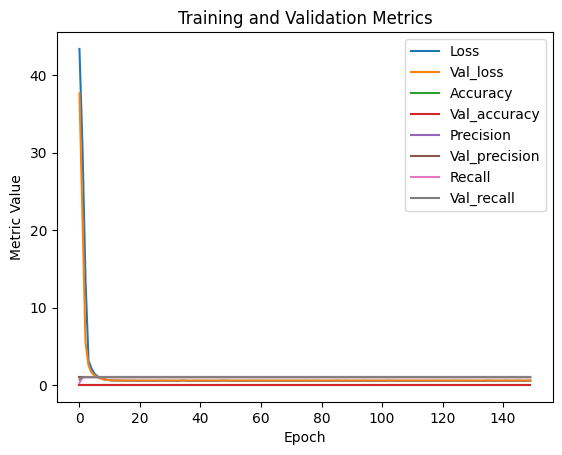

In [8]:
evaluate(studio, target, "studios_trained_model.h5")

### Analysis of Genres+Studios

Number of features (including encoded genres): 72
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0000e+00 - loss: 43.7673 - precision: 0.7895 - recall: 0.2529 - val_accuracy: 0.0000e+00 - val_loss: 29.6755 - val_precision: 1.0000 - val_recall: 0.9872
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 23.7788 - precision: 1.0000 - recall: 0.9907 - val_accuracy: 0.0000e+00 - val_loss: 6.5446 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 4.4692 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.8001 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 3.1521 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.4323 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 2.1906 - precision: 1.0000 - recall: 1.0000 - val_accuracy

Model saved to genre_studio_model.h5


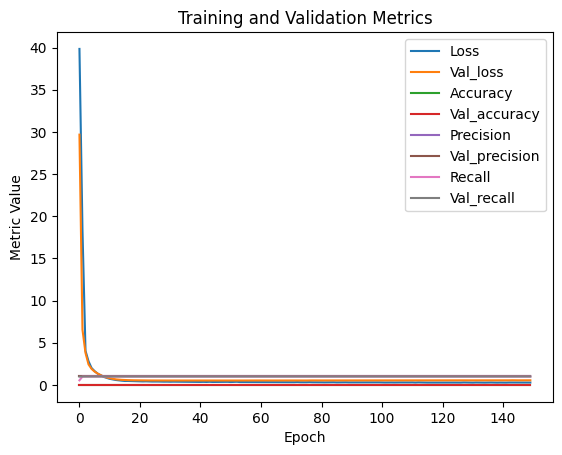

In [9]:
genre_studio = genres + studio
evaluate(genre_studio, target, "genre_studio_model.h5")

Model based on `Genres` + `Studios`(mse=0.2~) performs better than models based on `Genres`(mse=0.48~) or `Studios`(mse=0.5~) alone\
Hence, creating a model based on `Genres` + `Studios` together actually helps to make better `Score` predictions

### Analysis of Popularity

Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 195006.9219 - precision: 1.0000 - recall: 0.5779 - val_accuracy: 0.0000e+00 - val_loss: 58439.5117 - val_precision: 1.0000 - val_recall: 0.9953
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 23382.2852 - precision: 1.0000 - recall: 0.6644 - val_accuracy: 0.0000e+00 - val_loss: 5464.3838 - val_precision: 1.0000 - val_recall: 0.9895
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3927.6387 - precision: 1.0000 - recall: 0.7562 - val_accuracy: 0.0000e+00 - val_loss: 606.1428 - val_precision: 1.0000 - val_recall: 0.9720
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 650.2685 - precision: 1.0000 - recall: 0.7580 - val_accuracy: 0.0000e+00 - val_loss: 171.9991 - val_precision: 1.0000 - val_recall: 0.9592
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 128.2162 - precision: 1.0000 - recal

Model saved to pop_model.h5


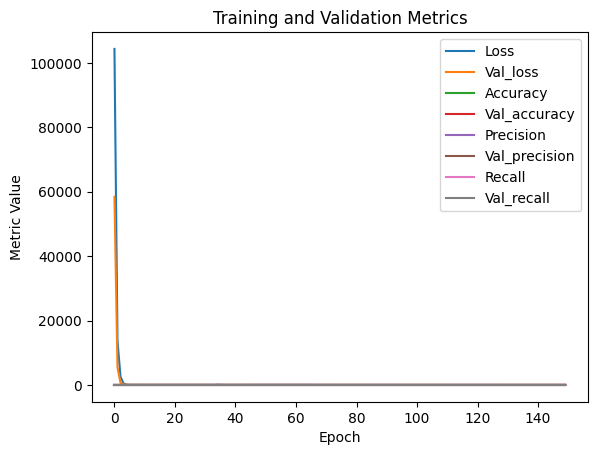

In [10]:
evaluate(['Popularity'], target, "pop_model.h5")

Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 752620416.0000 - precision: 0.7368 - recall: 0.3918 - val_accuracy: 0.0000e+00 - val_loss: 47193876.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 54947924.0000 - precision: 0.3684 - recall: 0.0822 - val_accuracy: 0.0000e+00 - val_loss: 28382234.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 12297809.0000 - precision: 1.0000 - recall: 0.6738 - val_accuracy: 0.0000e+00 - val_loss: 1476682.1250 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1592053.3750 - precision: 1.0000 - recall: 0.8550 - val_accuracy: 0.0000e+00 - val_loss: 33193.7227 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 -

Model saved to mem_model.h5


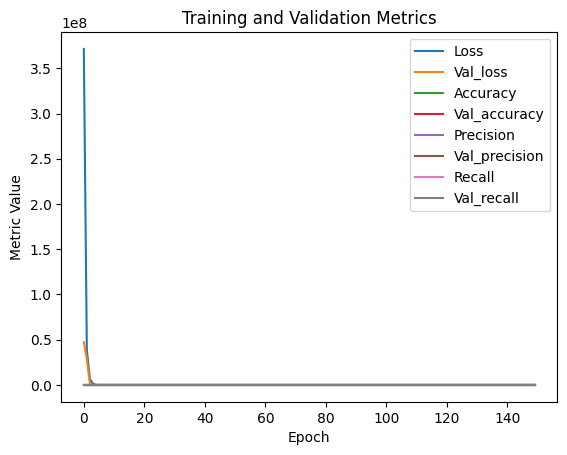

In [11]:
evaluate(['Members'], target, "mem_model.h5")

Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 65320.3945 - precision: 1.0000 - recall: 0.3926 - val_accuracy: 0.0000e+00 - val_loss: 18802.1055 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 9880.7686 - precision: 0.6842 - recall: 0.1926 - val_accuracy: 0.0000e+00 - val_loss: 38394.1875 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 26841.7461 - precision: 0.7895 - recall: 0.2276 - val_accuracy: 0.0000e+00 - val_loss: 55751.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 28304.5332 - precision: 0.8421 - recall: 0.3071 - val_accuracy: 0.0000e+00 - val_loss: 83176.8984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss

Model saved to fav_model.h5


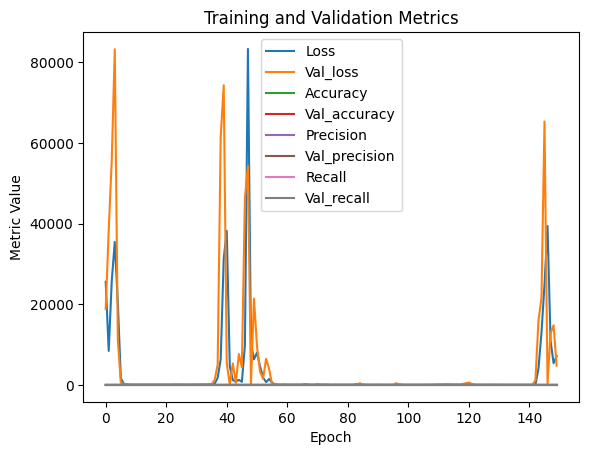

In [12]:
evaluate(['Favorites'], target, "fav_model.h5")

We realise that the loss(mse) of numerical variables seem to be quite high, meaning poor performing neural network models of numerical variables (Even after we have accounted for possible overfitting)\
This could be because of the large variations and range of numerical variable values making it hard for KNN model to perform well\
To fix this problem, we standardise the numerical variables to a smaller range to aid the KNN model's performance

### Standardise Function

In [13]:
def standardize(df):
  """
  This function performs standardization (Z-score) on a Pandas DataFrame.

  Args:
      df: A Pandas DataFrame.

  Returns:
      A Pandas DataFrame with standardized columns.
  """
  return (df - df.mean()) / df.std()

0      -1.161535
1      -1.110124
2      -0.717832
3       0.125761
4      -0.855349
          ...   
4276   -0.393919
4277    0.432959
4278    0.011036
4279   -0.254122
4280    0.548443
Name: Popularity, Length: 4281, dtype: float64
Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 46.6625 - precision: 0.6842 - recall: 0.0525 - val_accuracy: 0.0000e+00 - val_loss: 39.9426 - val_precision: 1.0000 - val_recall: 0.6254
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 37.6564 - precision: 1.0000 - recall: 0.7661 - val_accuracy: 0.0000e+00 - val_loss: 27.8849 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 24.3723 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 12.6882 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 10.0498 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.7705 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.0393 - precision: 1.0000 - recall: 1.0000 - val_accu

Model saved to pop_standard_model.h5


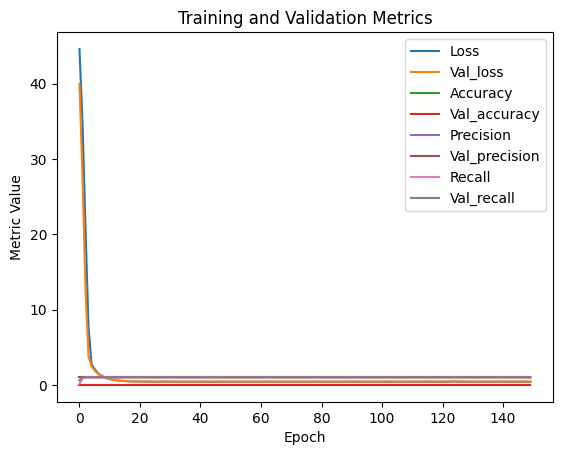

In [14]:
df['Popularity']=standardize(df['Popularity'])
print(df['Popularity'])
evaluate(['Popularity'], target, "pop_standard_model.h5")

0       4.869970
1       1.710741
2      -0.150820
3      -0.444067
4       0.048118
          ...   
4276   -0.353448
4277   -0.462394
4278   -0.431705
4279   -0.390131
4280   -0.466618
Name: Members, Length: 4281, dtype: float64
Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 45.6409 - precision: 0.9474 - recall: 0.0467 - val_accuracy: 0.0000e+00 - val_loss: 39.9119 - val_precision: 1.0000 - val_recall: 0.6161
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 37.4306 - precision: 1.0000 - recall: 0.7837 - val_accuracy: 0.0000e+00 - val_loss: 28.9456 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 25.3051 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 15.3266 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 11.9230 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 5.5042 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.0774 - precision: 1.0000 - recall: 1.0000 - val_accu

Model saved to mem_standard_model.h5


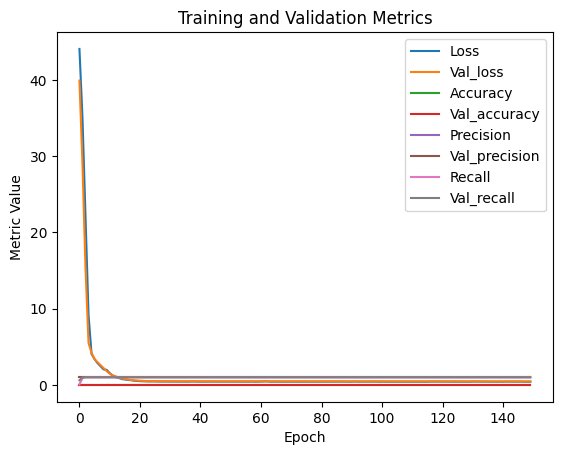

In [15]:
df['Members']=standardize(df['Members'])
print(df['Members'])
evaluate(['Members'], target, "mem_standard_model.h5")

0       7.968220
1       1.344463
2      -0.160149
3      -0.222641
4      -0.015760
          ...   
4276   -0.205532
4277   -0.220033
4278   -0.210748
4279   -0.215964
4280   -0.221076
Name: Favorites, Length: 4281, dtype: float64
Number of features (including encoded genres): 1
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 45.9431 - precision: 1.0000 - recall: 0.0288 - val_accuracy: 0.0000e+00 - val_loss: 40.3541 - val_precision: 1.0000 - val_recall: 0.6511
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 38.2893 - precision: 1.0000 - recall: 0.8806 - val_accuracy: 0.0000e+00 - val_loss: 30.0954 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 25.5474 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 14.8779 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 10.0242 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 4.2981 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2.5424 - precision: 1.0000 - recall: 1.0000 - val_accu

Model saved to fav_standard_model.h5


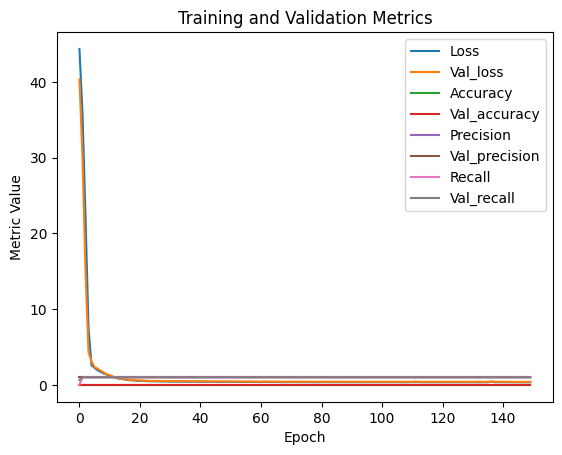

In [16]:
df['Favorites']=standardize(df['Favorites'])
print(df['Favorites'])
evaluate(['Favorites'], target, "fav_standard_model.h5")

Now that our KNN models for numerical variables are performing better, we can evaluate them with our categorial variables

### Analysis of Genres+Studios+Popularity

float64
Number of features (including encoded genres): 73
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0000e+00 - loss: 41.4501 - precision: 0.9474 - recall: 0.3929 - val_accuracy: 0.0000e+00 - val_loss: 24.4275 - val_precision: 1.0000 - val_recall: 0.9965
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 18.2919 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.7369 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 3.0720 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.6149 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 2.2741 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 1.8869 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1.7846 - precision: 1.0000 - recall: 1.0000 - val_accuracy

Model saved to total_trained_model.h5


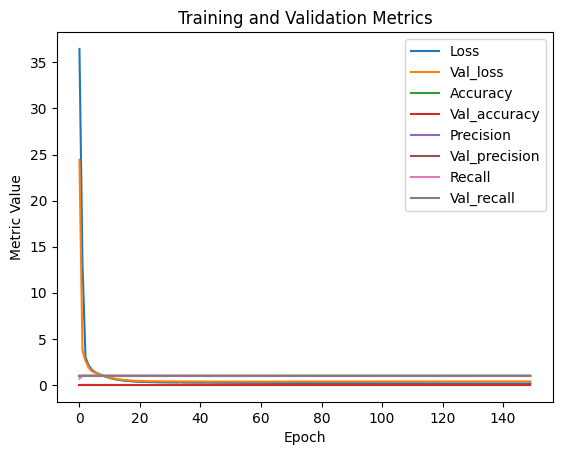

In [17]:
total = ['Popularity'] + genres + studio
print(df['Popularity'].astype(float).dtype)
df['Popularity'] = df['Popularity'].astype(float)
evaluate(total, target, "total_trained_model.h5")

### Analysis of Genres+Studios+Popularity+Members

Number of features (including encoded genres): 74
Epoch 1/150


c:\ProgramData\miniconda3\envs\sc\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 41.7920 - precision: 0.9474 - recall: 0.3820 - val_accuracy: 0.0000e+00 - val_loss: 23.4103 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 17.5211 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 4.2479 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.5235 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.0045 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2.3189 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 1.9503 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 1.6872 - precision: 1.0000 - recall: 1.0000 - val_accuracy

Model saved to total_trained_model.h5


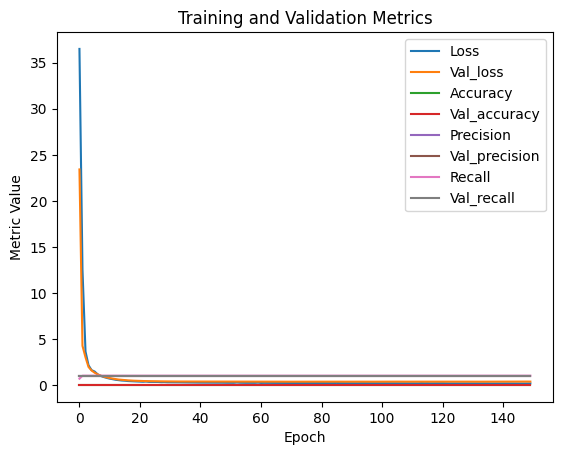

In [18]:
total2 = total + ['Members']
evaluate(total2, target, "total_trained_model.h5")